In [2]:
from matplotlib import pyplot as plt
import numpy as np

# The Harmonic Oscillator
We examine the HO in unit coordinates:
$$H = \frac{1}{2} \left(p^2 + q^2\right).$$
We calculate the EOM:
$$ \dot{q} = \frac{d}{dp} H = p \\
    \dot{p} = - \frac{d}{dq} = - q \\
    $$
Note, that these are the components of the Hamiltonian vector field $X_H$, which is plotted below:

In [3]:
gridlines = np.linspace(-1, 1, 20)
q, p = np.meshgrid(gridlines, gridlines)

# scale vectors up a bit
vecq = p
vecp = -q

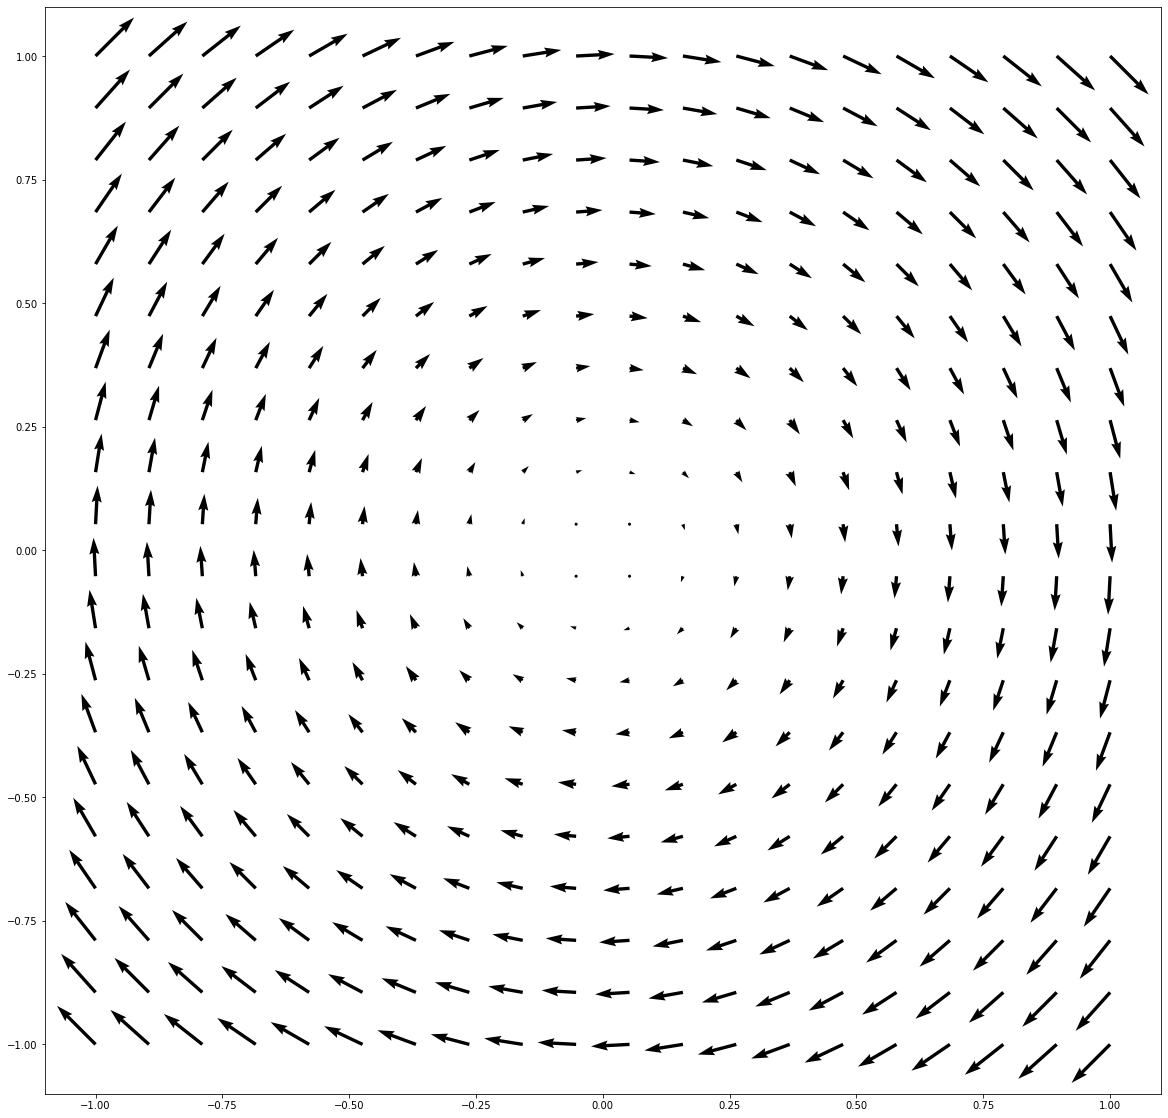

In [4]:
fig, ax = plt.subplots()
plt.quiver(q,p , vecq, vecp)
fig.set_size_inches((20, 20))

## Solving the EOM:
By differentiating $q$ again, we see $\ddot{q} = -q \implies q = A \cos t + B \sin t$, which immediately lets us solve the equation for $p = -A \sin t + B \cos t$.  
To make the plotting easier, we assume $B\equiv 0$, i.e. our solution is:
$$ 
    q = A \cos t \\
    p = -A \sin t.
$$
Since the flow of Hamiltonian vector fields preserves the Hamiltonian, it is constant and we can read off:
$$ H = \frac{1}{2} \left(A^2 \sin^2 t + A^2 \cos^2 t \right) = \frac{A^2}{2} \equiv \operatorname{const.}$$
This of course directly gives $A = \sqrt{2 H}$. 
Further it is obvious, that the trajectory is circular, which is plotted below:

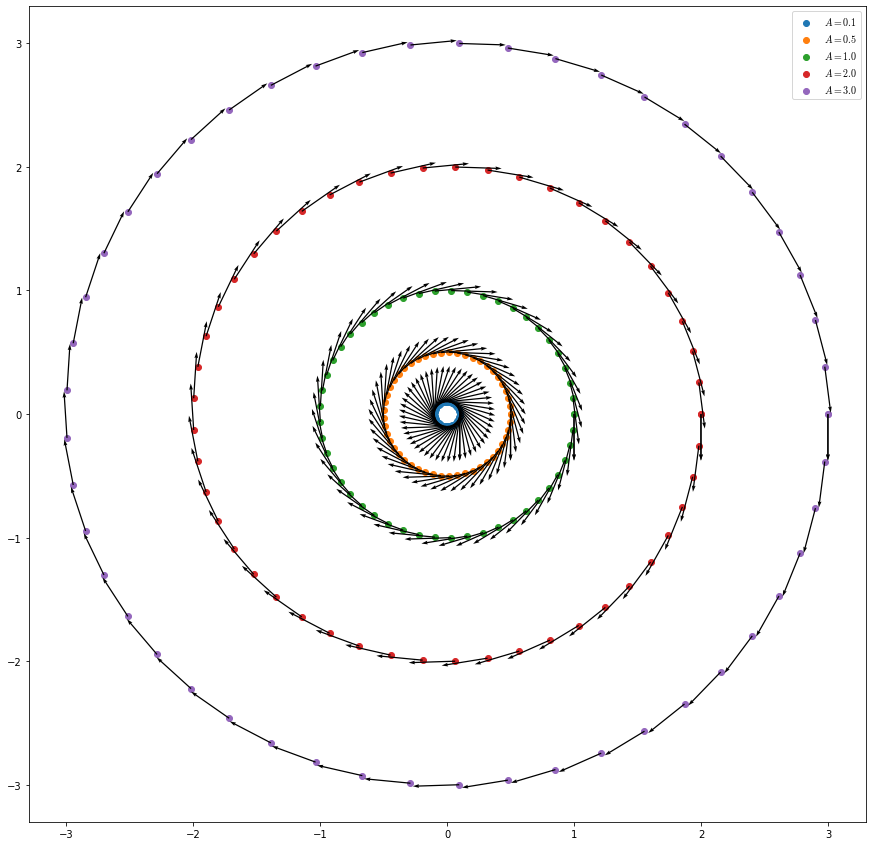

In [43]:
def traj(t, A):
    q = A * np.cos(t)
    p = - A * np.sin(t)
    return np.array([q, p]).T


fig, ax = plt.subplots()
t = np.linspace(0, 2 * np.pi)
As = [0.1, .5, 1, 2, 3]
handles = []
for A in As:
    xt = traj(t, A)
    vecq = xt[:, 1]
    vecp = - xt[:, 0]

    handles.append(plt.scatter(xt[:, 0], xt[:, 1]))
    plt.quiver(xt[:, 0], xt[:, 1], vecq, vecp, width=0.0015)

lgds = tuple(map(lambda A: f'$A={round(A, 1)}$', As))
plt.legend(handles, lgds)
fig.set_size_inches((15, 15))

# Integrators
We use three different numeric methods, all with $dt=0.003$:
## $(i)$ Euler forwards:
Defining $$D = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix},$$
the algorithm is given by
$$ 
    u_{n+1} = u_n + \Delta t D u_{n}.
$$
With initial condition $u_0 = (1, 0)$ and hence $H = \frac{1}{2}$, this gives the trajectory:

[Text(0, 0.5, '$p$'), Text(0.5, 0, '$q$'), Text(0.5, 1.0, 'Euler forward')]

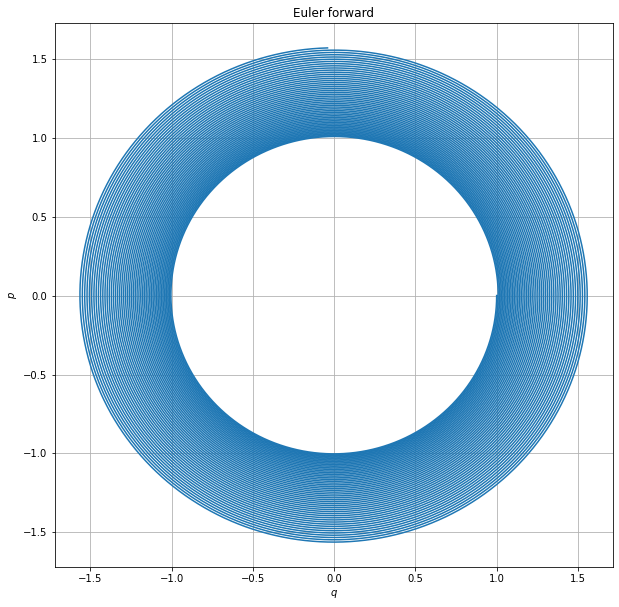

In [6]:

euler_fwds = np.loadtxt("data/euler_fwd.dat")

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
ax.plot(euler_fwds[:, 1], euler_fwds[:, 2])
ax.set(title="Euler forward", xlabel="$q$", ylabel="$p$")

And we can examine the energy, which should be constantly at 0.5, however we can see that it is steadily increasing.

[Text(0, 0.5, 'E'),
 Text(0.5, 0, 't'),
 Text(0.5, 1.0, 'Energy - Euler forwards')]

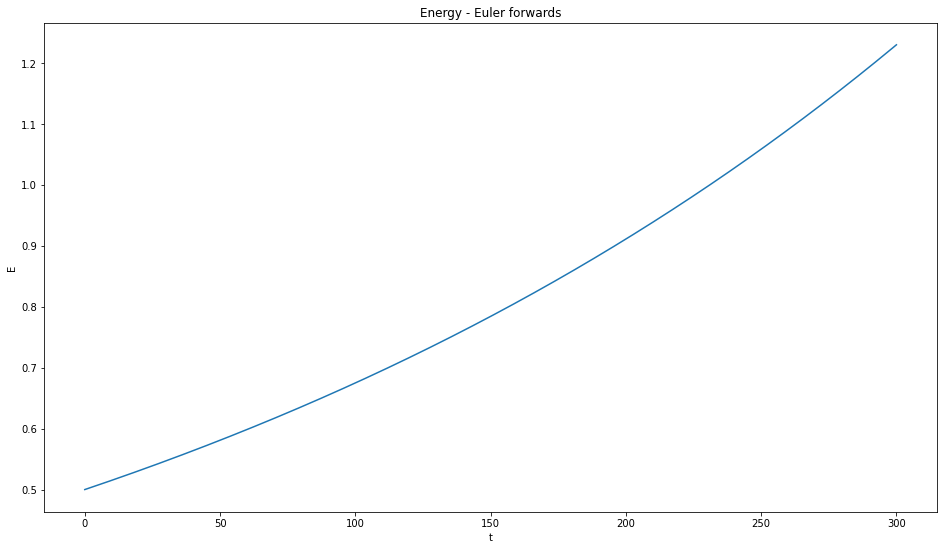

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(euler_fwds[:, 0], euler_fwds[:, 3])
ax.set(title="Energy - Euler forwards", xlabel="t", ylabel="E")

## $(ii)$ Implicit Euler

[Text(0, 0.5, '$p$'), Text(0.5, 0, '$q$'), Text(0.5, 1.0, 'Implicit Euler')]

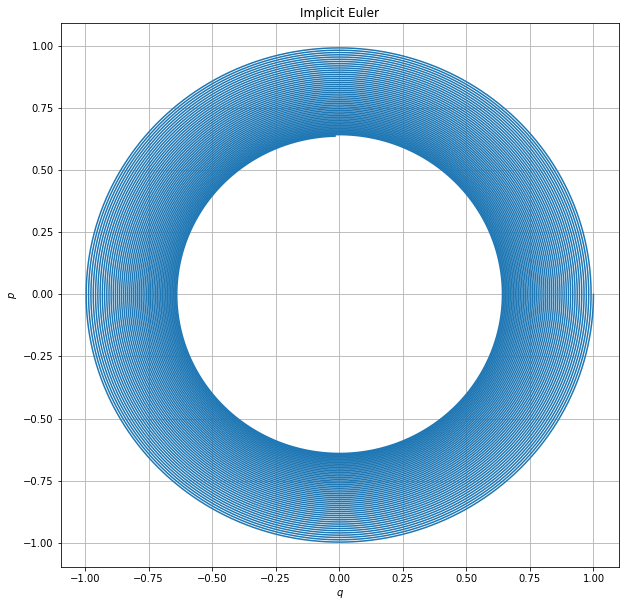

In [8]:
euler_impl = np.loadtxt("data/euler_impl.dat")

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
ax.plot(euler_impl[:, 1], euler_impl[:, 2])
ax.set(title="Implicit Euler", xlabel="$q$", ylabel="$p$")

Again the energy should be constantly at $0.5$:

Energy:


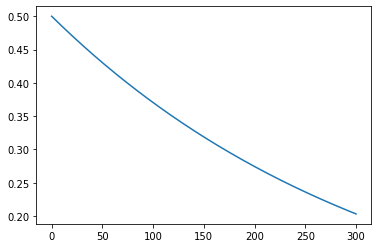

In [9]:
print("Energy:")
fig, ax = plt.subplots()
_ = ax.plot(euler_impl[:, 0], euler_impl[:, 3])

## $(iii)$ Leapfrog

[Text(0, 0.5, '$p$'), Text(0.5, 0, '$q$'), Text(0.5, 1.0, 'Leap frog')]

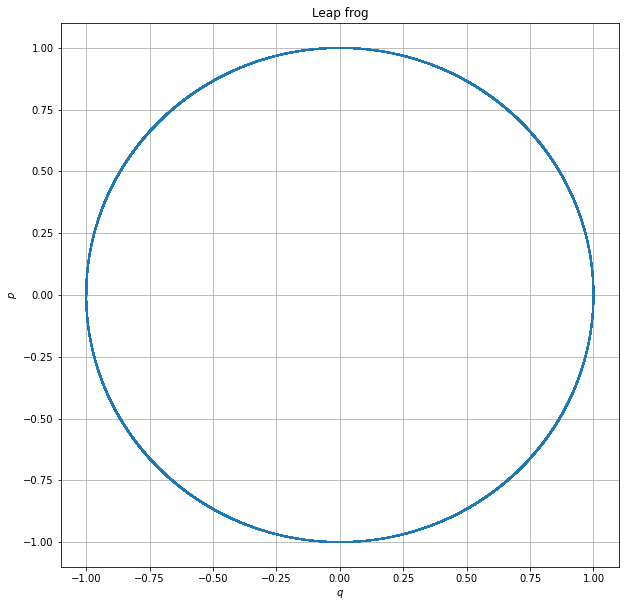

In [10]:
leap = np.loadtxt("data/leap_frog.dat")

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
ax.plot(leap[:, 1], leap[:, 2])
ax.set(title="Leap frog", xlabel="$q$", ylabel="$p$")

Again the energy should be constantly at $0.5$ and indeed, up to microscopic fluctuations we have constant energy.

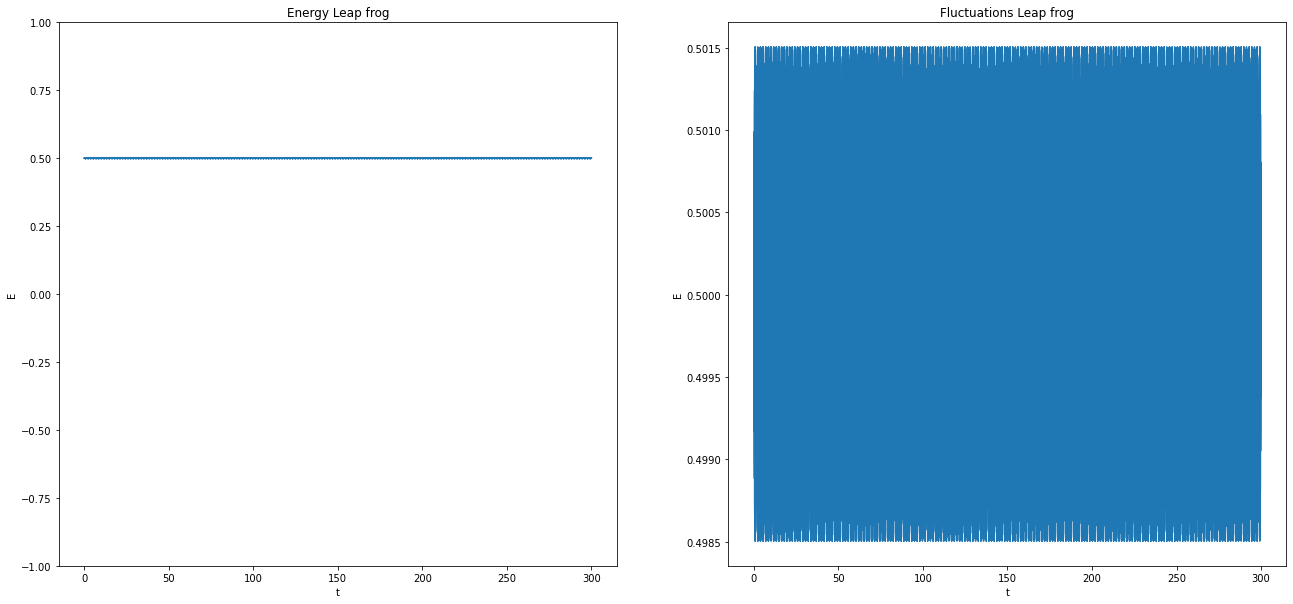

In [18]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(leap[:, 0], leap[:, 3])
axs[0].set(title="Energy Leap frog", xlabel="t", ylabel="E")
axs[0].set(ylim=(-1, 1))

axs[1].plot(leap[:, 0], leap[:, 3])
axs[1].set(title="Fluctuations Leap frog", xlabel="t", ylabel="E")

fig.set_size_inches((22, 10))

# Velocity Verlet

[Text(0, 0.5, '$p$'), Text(0.5, 0, '$q$'), Text(0.5, 1.0, 'velocity verlet')]

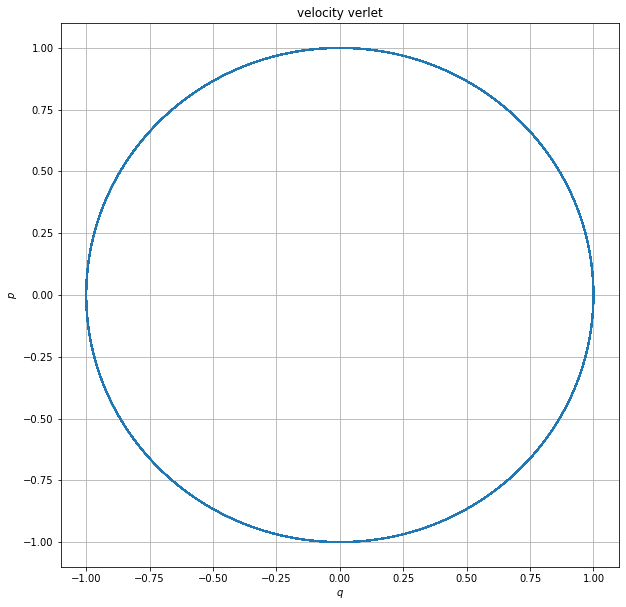

In [19]:
vel = np.loadtxt("data/vel_verlet.dat")

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
ax.plot(vel[:, 1], vel[:, 2])
ax.set(title="velocity verlet", xlabel="$q$", ylabel="$p$")

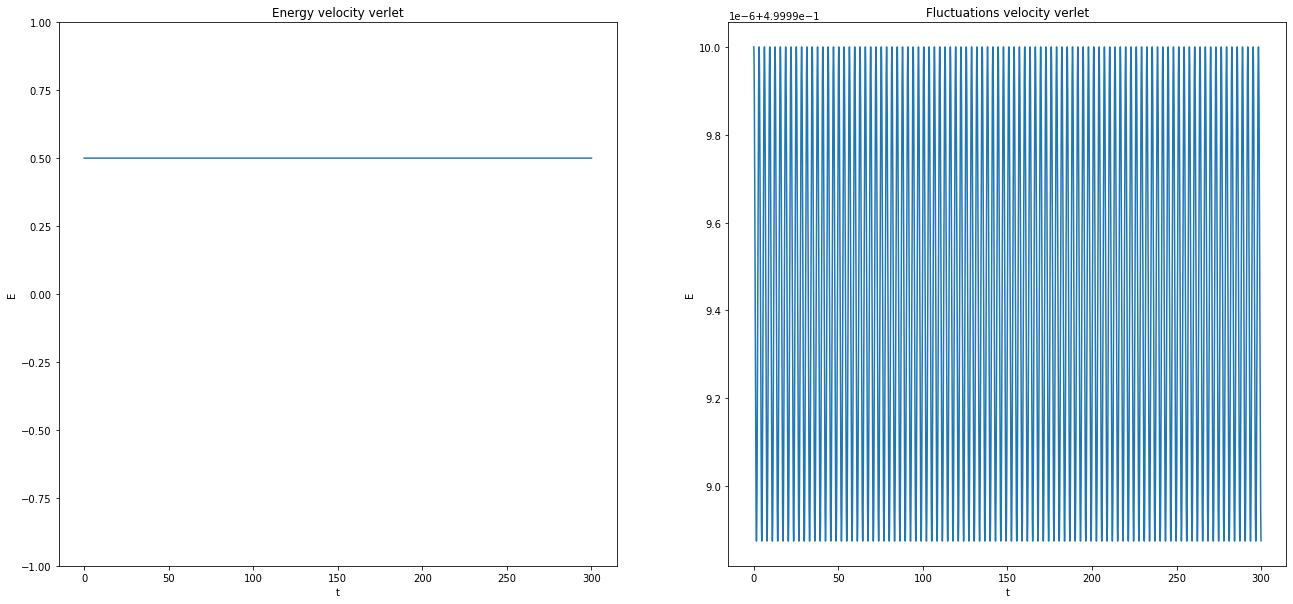

In [21]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(vel[:, 0], vel[:, 3])
axs[0].set(title="Energy velocity verlet", xlabel="t", ylabel="E")
axs[0].set(ylim=(-1, 1))

axs[1].plot(vel[:, 0], vel[:, 3])
axs[1].set(title="Fluctuations velocity verlet", xlabel="t", ylabel="E")

fig.set_size_inches((22, 10))

## Redrawing the velocities
Her we use $dt = 0.03$

[Text(0, 0.5, '$p$'), Text(0.5, 0, '$q$'), Text(0.5, 1.0, 'velocity verlet')]

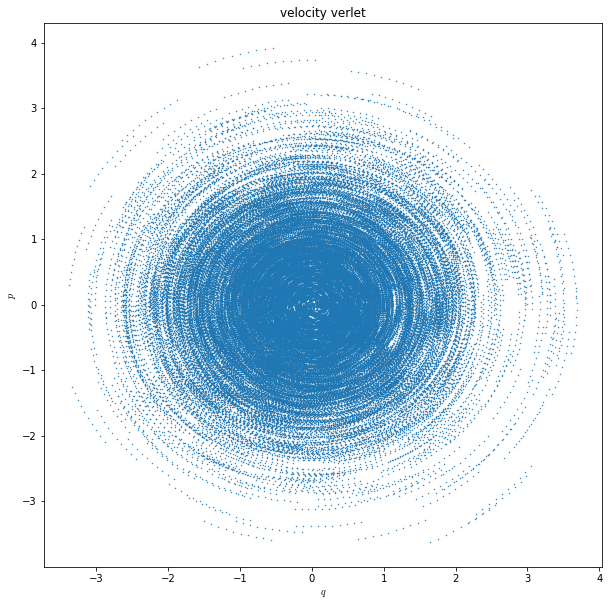

In [24]:
vel_r = np.loadtxt("data/vel_verlet_redraw.dat")

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(vel_r[:, 1], vel_r[:, 2],'.',markersize=0.9)

ax.set(title="velocity verlet", xlabel="$q$", ylabel="$p$")

The energy now wildly fluctuates since we fixed only the temperature to $\beta = 1$

[Text(0, 0.5, '$E$'),
 Text(0.5, 0, 't'),
 Text(0.5, 1.0, 'Energy with redrawing the velocities')]

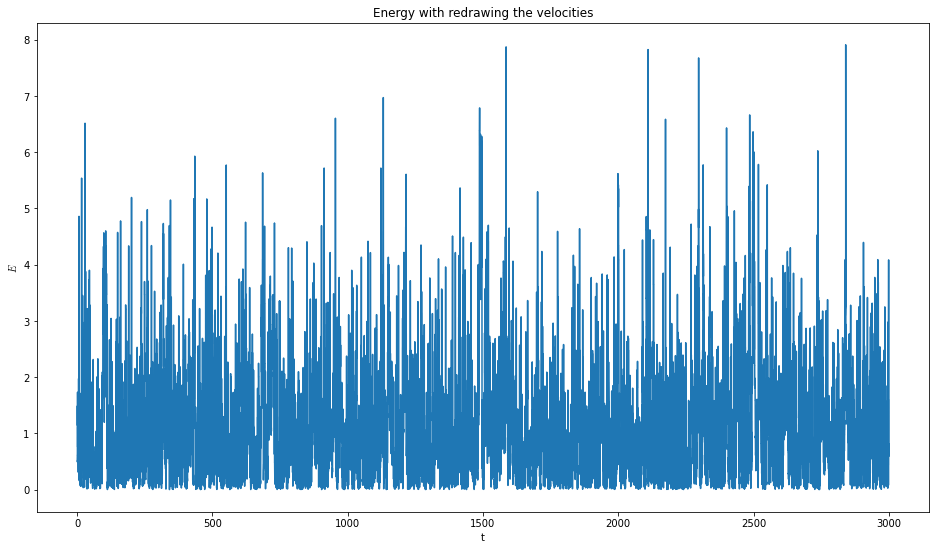

In [27]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(vel_r[:, 0], vel_r[:, 3])
ax.set(title="Energy with redrawing the velocities", xlabel="t", ylabel="$E$")

Now we can compare the distribution of $q$ and $p$ and we see, they acutally agree.  
However note, that some tweaking has to be done, to find the correct parameters. If we redraw a velocity, we need to give the system enough time, to wander towards the correct positions. So we have to choose $dt$ and the nr of steps between each redraw big enough or else this will not converge.  
If we define $x$ which can either be $p$ or $q$, the corresponding distribution is:
$$
    P(x) = \sqrt{\frac{\beta}{2 \pi}} e^{-\frac{x^2}{2 \beta}}.
$$
For simplicity we then choose $\beta=1$:

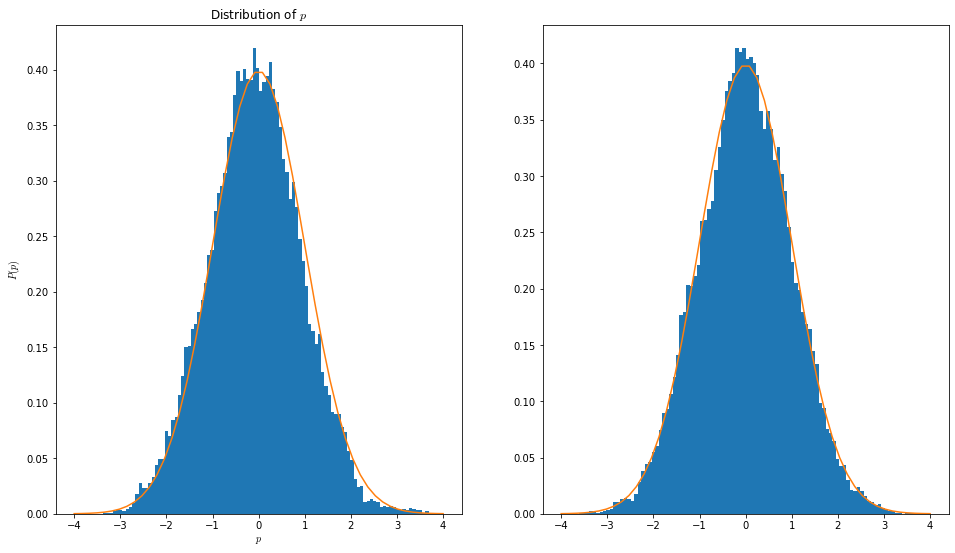

In [42]:
vx = np.linspace(-4, 4)
distr = np.exp(-vx**2 / 2) / np.sqrt(2 * np.pi)
fig, axs = plt.subplots(1, 2, figsize = (16, 9))
_ = axs[0].hist(vel_r[:, 1], bins=100, density=True)
axs[0].plot(vx, distr)
axs[0].set(title="Distribution of $q$", xlabel="$q$", ylabel="$P(q)$")
_ = axs[1].hist(vel_r[:, 2], bins=100, density=True)
axs[0].set(title="Distribution of $p$", xlabel="$p$", ylabel="$P(p)$")
axs[1].plot(vx, distr)